In [14]:
# Setup matplotlib to plot inline
%matplotlib inline
# Import the pyplot module of Matplotlib as plt
import matplotlib.pyplot as plt
# Import pandas under the abbreviation 'pd'
import pandas as pd
# Import NumPy under the abbreviation 'np'
import numpy as np

In [15]:
data = pd.read_csv('data_banknote_authentication.csv')
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [16]:
x = data[['variance', 'skewness']].values
y = data['class'].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1029, 2), (343, 2), (1029,), (343,))

### Standardize dataset

In [19]:
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)


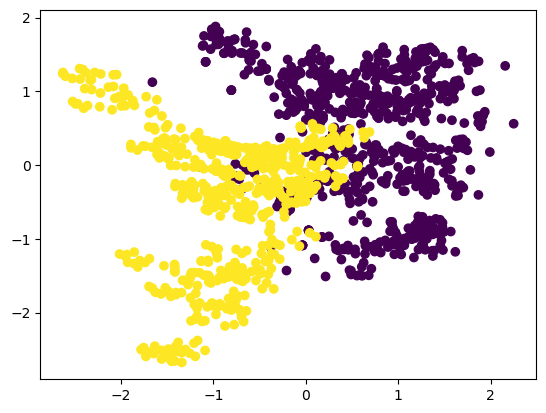

In [20]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()


In [21]:
# Perceptron algorithm
def perceptron(x, y, lr=0.1, n_iters=100):
    w = np.zeros(x.shape[1])
    b = 0

    for _ in range(n_iters):
        for i in range(x.shape[0]):
            if y[i] * (np.dot(x[i], w) + b) <= 0:
                w += lr * y[i] * x[i]
                b += lr * y[i]

    return w, b

perceptron_w, perceptron_b = perceptron(x, y)



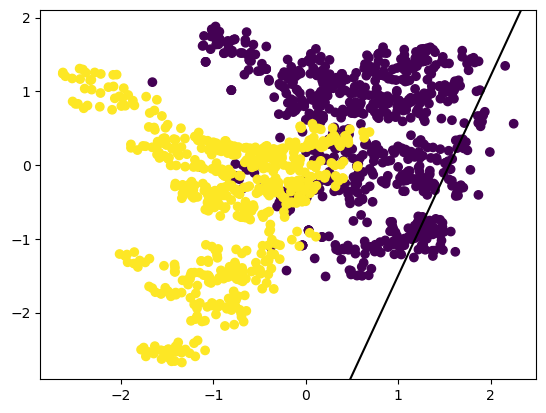

In [22]:
# Plot decision boundary for Perceptron
plt.scatter(x[:, 0], x[:, 1], c=y)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
x_boundary = np.linspace(xlim[0], xlim[1])
y_boundary = -(perceptron_w[0] / perceptron_w[1]) * x_boundary - (perceptron_b / perceptron_w[1])
plt.plot(x_boundary, y_boundary, color='black')
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

In [23]:
# Adaline algorithm
def adaline(x, y, lr=0.1, n_iters=100):
    w = np.zeros(x.shape[1])
    b = 0

    for i in range(n_iters):
        output = np.dot(x, w) + b
        errors = y - output
        w += lr * np.dot(x.T, errors)
        b += lr * errors.sum()

    return w, b

adaline_w, adaline_b = adaline(x, y)

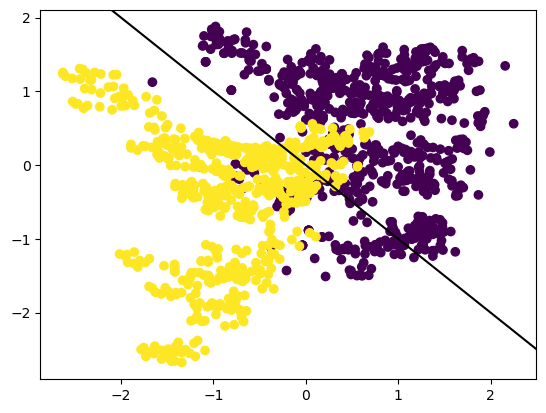

In [24]:

# Plot decision boundary for Adaline
plt.scatter(x[:, 0], x[:, 1], c=y)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
x_boundary = np.linspace(xlim[0], xlim[1])
y_boundary = -(adaline_w[0] / adaline_w[1]) * x_boundary - (adaline_b / adaline_w[1])
plt.plot(x_boundary, y_boundary, color='black')
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

In [25]:
# Comparison of errors
perceptron_predictions = np.sign(np.dot(x, perceptron_w) + perceptron_b)
adaline_predictions = np.sign(np.dot(x, adaline_w) + adaline_b)

perceptron_error = np.sum(perceptron_predictions != y)
adaline_error = np.sum(adaline_predictions != y)

print('Perceptron error:', perceptron_error)
print('Adaline error:', adaline_error)

Perceptron error: 762
Adaline error: 1300
